In [1]:
import pandas as pd
import numpy as np

pd.set_option('mode.use_inf_as_na', True) 

In [2]:
data = pd.read_csv('marketing_dataset.csv', usecols = [1,2,3],parse_dates = [0,1]) 

#выбираем только интересные колонки, а затем 
# преобразуем данные в требуемых колонках в дату, учитывая, что датафрейм уже образован со смещением на одну колонку из-за 
#usecols = [1,2,3], т.е. колонка под номером [0] убрана и на её место смещена колонка бывшая под номером [1]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869731 entries, 0 to 869730
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   visit_date       869731 non-null  datetime64[ns]
 1   conversion_date  103514 non-null  datetime64[ns]
 2   channel          869731 non-null  object        
dtypes: datetime64[ns](2), object(1)
memory usage: 19.9+ MB


In [4]:
type(data.visit_date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
data['time_to_order'] = data['conversion_date'] - data['visit_date'] 
                                                #создаём столбец с данными по времени между датой посещения и датой покупки
data

,visit_date,conversion_date,channel,time_to_order
0,2015-01-01 15:16:08.239468,NaT,bloggers,NaT
1,2015-01-01 14:24:41.728927,NaT,bloggers,NaT
2,2015-01-01 12:03:01.710107,NaT,bloggers,NaT
3,2015-01-01 15:03:26.306819,NaT,bloggers,NaT
4,2015-01-01 13:00:58.124915,NaT,bloggers,NaT
...,...,...,...,...
869726,2019-11-30 12:35:22.752916,NaT,direct,NaT
869727,2019-11-30 11:48:22.611818,2019-12-05 23:24:51.463522,direct,5 days 11:36:28.851704
869728,2019-11-30 11:16:06.211602,NaT,direct,NaT
869729,2019-11-30 11:30:02.416155,NaT,direct,NaT


In [6]:
def conversion(x):
    if x <= pd.Timedelta(7, unit='D'): #сравниваем время, поэтому конвертирем в необходимый формат
        return 1
    else:
        return 0

In [7]:
data['in_window'] = data['time_to_order'].apply(conversion)
# создаём столбец с данными была ли совершена покупка в пределах окна конверсии(7 дней)
data

,visit_date,conversion_date,channel,time_to_order,in_window
0,2015-01-01 15:16:08.239468,NaT,bloggers,NaT,0
1,2015-01-01 14:24:41.728927,NaT,bloggers,NaT,0
2,2015-01-01 12:03:01.710107,NaT,bloggers,NaT,0
3,2015-01-01 15:03:26.306819,NaT,bloggers,NaT,0
4,2015-01-01 13:00:58.124915,NaT,bloggers,NaT,0
...,...,...,...,...,...
869726,2019-11-30 12:35:22.752916,NaT,direct,NaT,0
869727,2019-11-30 11:48:22.611818,2019-12-05 23:24:51.463522,direct,5 days 11:36:28.851704,1
869728,2019-11-30 11:16:06.211602,NaT,direct,NaT,0
869729,2019-11-30 11:30:02.416155,NaT,direct,NaT,0


In [8]:
data.sort_values(by = 'visit_date')

,visit_date,conversion_date,channel,time_to_order,in_window
79,2015-01-01 07:17:48.762688,NaT,bloggers,NaT,0
344095,2015-01-01 07:43:07.498855,NaT,organics,NaT,0
344247,2015-01-01 07:48:39.299999,NaT,organics,NaT,0
18,2015-01-01 08:06:47.510442,NaT,bloggers,NaT,0
344227,2015-01-01 08:13:46.534953,NaT,organics,NaT,0
...,...,...,...,...,...
344053,2021-12-31 18:53:06.427085,NaT,bloggers,NaT,0
866705,2021-12-31 18:57:05.188208,NaT,organics,NaT,0
866750,2021-12-31 19:06:21.181448,NaT,organics,NaT,0
866684,2021-12-31 19:06:50.433626,NaT,organics,NaT,0


In [9]:
#убираем из датасета искусственно синтезированные (исходя из условий задачи) данные (все данные с 01.01.2021)
actual_data = data.loc[data['visit_date'] < '2021-01-01'] 
actual_data.sort_values(by = 'visit_date')

,visit_date,conversion_date,channel,time_to_order,in_window
79,2015-01-01 07:17:48.762688,NaT,bloggers,NaT,0
344095,2015-01-01 07:43:07.498855,NaT,organics,NaT,0
344247,2015-01-01 07:48:39.299999,NaT,organics,NaT,0
18,2015-01-01 08:06:47.510442,NaT,bloggers,NaT,0
344227,2015-01-01 08:13:46.534953,NaT,organics,NaT,0
...,...,...,...,...,...
770926,2020-12-31 18:49:57.547429,2021-01-29 02:33:31.733530,organics,28 days 07:43:34.186101,0
770874,2020-12-31 19:10:47.259471,NaT,organics,NaT,0
770943,2020-12-31 19:12:11.690514,NaT,organics,NaT,0
280685,2020-12-31 19:22:29.363153,2021-01-01 09:04:03.793205,bloggers,0 days 13:41:34.430052,1


In [10]:
# смотрим, на какие группы трафика классифицированы данные в датасете
actual_data['channel'].unique()


array(['bloggers', 'organics', 'direct'], dtype=object)

In [11]:
# исходя из обнаруженных групп трафика делим датасет на три части
actual_data_bloggers = actual_data.loc[actual_data['channel'] == 'bloggers']
actual_data_organics = actual_data.loc[actual_data['channel'] == 'organics']
actual_data_direct =  actual_data.loc[actual_data['channel'] == 'direct']

In [12]:
# расчитываем среднюю конверсию в каждый день недели для каждой группы

actual_data_bloggers['dayofweek'] = actual_data_bloggers['conversion_date'].dt.dayofweek
bloggers_mean_daily = actual_data_bloggers.groupby('dayofweek').in_window.mean()

actual_data_organics['dayofweek'] = actual_data_organics['conversion_date'].dt.dayofweek
organics_mean_daily  = actual_data_organics.groupby('dayofweek').in_window.mean()

actual_data_direct['dayofweek'] = actual_data_direct['conversion_date'].dt.dayofweek
direct_mean_daily  = actual_data_direct.groupby('dayofweek').in_window.mean()

print(
    bloggers_mean_daily,
    organics_mean_daily,
    direct_mean_daily
)

dayofweek
0.0    0.827137
1.0    0.833868
2.0    0.842105
3.0    0.846649
4.0    0.837221
5.0    0.829842
6.0    0.827135
Name: in_window, dtype: float64 dayofweek
0.0    0.824605
1.0    0.839726
2.0    0.839318
3.0    0.841465
4.0    0.842739
5.0    0.822489
6.0    0.816259
Name: in_window, dtype: float64 dayofweek
0.0    0.872093
1.0    0.728395
2.0    0.835294
3.0    0.877551
4.0    0.842105
5.0    0.879121
6.0    0.792683
Name: in_window, dtype: float64


<ipython-input-12-115b470367e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data_bloggers['dayofweek'] = actual_data_bloggers['conversion_date'].dt.dayofweek
<ipython-input-12-115b470367e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data_organics['dayofweek'] = actual_data_organics['conversion_date'].dt.dayofweek
<ipython-input-12-115b470367e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

### Обзор средней конверсии в каждый день недели.

В случае блогерского трафика:
    Понедельник, суббота и воскресенье дни с наименьшей конверсией, а четверг - с наибольшей.
    
В случае естественного трафика:
    Также понедельник, суббота и воскресенье дни с наименьшей конверсией, а четверг и пятница - с наибольшей.
    
В случае рекламы на игровых площадках:
    Наиболее слабый по конверсии день - вторник. И наиболее успешные - понедельник, четверг и суббота.

In [13]:
# расчитываем среднюю конверсию в каждый месяц

actual_data_bloggers['monthofyear'] = actual_data_bloggers['conversion_date'].dt.month
bloggers_mean_monthly = actual_data_bloggers.groupby('monthofyear').in_window.mean()

actual_data_organics['monthofyear'] = actual_data_organics['conversion_date'].dt.month
organics_mean_monthly = actual_data_organics.groupby('monthofyear').in_window.mean()

actual_data_direct['monthofyear'] = actual_data_direct['conversion_date'].dt.month
direct_mean_monthly = actual_data_direct.groupby('monthofyear').in_window.mean()

print(
    bloggers_mean_monthly,
    organics_mean_monthly,
    direct_mean_monthly
)

monthofyear
1.0     0.763415
2.0     0.758447
3.0     0.864857
4.0     0.850370
5.0     0.850274
6.0     0.829682
7.0     0.820202
8.0     0.826748
9.0     0.832263
10.0    0.847302
11.0    0.839489
12.0    0.860203
Name: in_window, dtype: float64 monthofyear
1.0     0.775720
2.0     0.705752
3.0     0.842715
4.0     0.878598
5.0     0.853890
6.0     0.821098
7.0     0.805764
8.0     0.814023
9.0     0.843582
10.0    0.847985
11.0    0.842406
12.0    0.852613
Name: in_window, dtype: float64 monthofyear
1.0     0.000000
2.0     0.000000
3.0     0.000000
4.0     0.000000
10.0    0.000000
11.0    0.926471
12.0    0.378378
Name: in_window, dtype: float64


<ipython-input-13-fa1fd12c480f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data_bloggers['monthofyear'] = actual_data_bloggers['conversion_date'].dt.month
<ipython-input-13-fa1fd12c480f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data_organics['monthofyear'] = actual_data_organics['conversion_date'].dt.month
<ipython-input-13-fa1fd12c480f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

### Обзор средней конверсии в каждый месяц.

В случае блогерского трафика:
    Январь и февраль месяцы с наименьшей конверсией, а март и декабрь - с наибольшей.
    
В случае естественного трафика:
    Также январь и февраль месяцы с наименьшей конверсией, а апрель и декабрь - с наибольшей.
    
В случае рекламы на игровых площадках:
    Данных недостаточно, чтобы сделать однозначные выводы.

In [14]:
from fbprophet import Prophet # импортируем профет

In [15]:
# для обучения модели с учителем делим выборку на обучающую и контрольную для каждой из групп

train1 = actual_data_bloggers.loc[actual_data_bloggers['visit_date'] < '2020-01-01']
test1 = actual_data_bloggers.loc[actual_data_bloggers['visit_date'] >= '2020-01-01']

train2 = actual_data_organics.loc[actual_data_organics['visit_date'] < '2020-01-01']
test2 = actual_data_organics.loc[actual_data_organics['visit_date'] >= '2020-01-01']

train3 = actual_data_direct.loc[actual_data_direct['visit_date'] < '2019-11-24']
test3 = actual_data_direct.loc[actual_data_direct['visit_date'] >= '2019-11-24']

In [16]:
train3

,visit_date,conversion_date,channel,time_to_order,in_window,dayofweek,monthofyear
866861,2019-11-01 10:26:42.018281,NaT,direct,NaT,0,NaN,NaN
866862,2019-11-01 16:12:11.056444,NaT,direct,NaT,0,NaN,NaN
866863,2019-11-01 12:58:53.182085,NaT,direct,NaT,0,NaN,NaN
866864,2019-11-01 15:53:16.740612,NaT,direct,NaT,0,NaN,NaN
866865,2019-11-01 11:21:52.789867,NaT,direct,NaT,0,NaN,NaN
...,...,...,...,...,...,...,...
869056,2019-11-23 15:10:23.888421,NaT,direct,NaT,0,NaN,NaN
869057,2019-11-23 13:36:32.601210,NaT,direct,NaT,0,NaN,NaN
869058,2019-11-23 09:32:46.958121,NaT,direct,NaT,0,NaN,NaN
869059,2019-11-23 15:04:48.592210,NaT,direct,NaT,0,NaN,NaN


In [17]:
# train1_0 = train1.resample('D', on='visit_date')['in_window'].sum().reset_index() # сгруппировали данные обучающей выборки
# test1_0 = test1.resample('D', on='visit_date')['in_window'].sum().reset_index()  # сгруппировали данные контрольной выборки

# train2_0 = train2.resample('D', on='visit_date')['in_window'].sum().reset_index() # сгруппировали данные обучающей выборки
# test2_0 = test2.resample('D', on='visit_date')['in_window'].sum().reset_index()  # сгруппировали данные контрольной выборки

# train3_0 = train3.resample('D', on='visit_date')['in_window'].sum().reset_index() # сгруппировали данные обучающей выборки
# test3_0 = test3.resample('D', on='visit_date')['in_window'].sum().reset_index()  # сгруппировали данные контрольной выборки

In [18]:
# сгруппировали данные обучающей выборки блогерского трафика

train1_0 = pd.merge(train1.resample('D', on='visit_date')['in_window'].sum().reset_index(), 
                  train1.resample('D', on='visit_date')['in_window'].count().reset_index(),
                  how='left',left_on='visit_date', right_on='visit_date'
        )

train1_0 ['convertion'] = train1_0.in_window_x/train1_0.in_window_y

train1_0.drop(['in_window_x','in_window_y'], axis=1, inplace = True)

# сгруппировали данные контрольной выборки блогерского трафика

test1_0 = pd.merge(test1.resample('D', on='visit_date')['in_window'].sum().reset_index(), 
                  test1.resample('D', on='visit_date')['in_window'].count().reset_index(),
                  how='left',left_on='visit_date', right_on='visit_date'
        )

test1_0 ['convertion'] = test1_0.in_window_x/test1_0.in_window_y

test1_0.drop(['in_window_x','in_window_y'], axis=1, inplace = True)

In [19]:
# сгруппировали данные обучающей выборки естественного трафика

train2_0 = pd.merge(train2.resample('D', on='visit_date')['in_window'].sum().reset_index(), 
                  train2.resample('D', on='visit_date')['in_window'].count().reset_index(),
                  how='left',left_on='visit_date', right_on='visit_date'
        )

train2_0 ['convertion'] = train2_0.in_window_x/train2_0.in_window_y

train2_0.drop(['in_window_x','in_window_y'], axis=1, inplace = True)

# сгруппировали данные контрольной выборки естественного трафика

test2_0 = pd.merge(test2.resample('D', on='visit_date')['in_window'].sum().reset_index(), 
                  test2.resample('D', on='visit_date')['in_window'].count().reset_index(),
                  how='left',left_on='visit_date', right_on='visit_date'
        )

test2_0 ['convertion'] = test2_0.in_window_x/test2_0.in_window_y

test2_0.drop(['in_window_x','in_window_y'], axis=1, inplace = True)

In [20]:
# сгруппировали данные обучающей выборки рекламы на игровых площадках

train3_0 = pd.merge(train3.resample('D', on='visit_date')['in_window'].sum().reset_index(), 
                  train3.resample('D', on='visit_date')['in_window'].count().reset_index(),
                  how='left',left_on='visit_date', right_on='visit_date'
        )

train3_0 ['convertion'] = train3_0.in_window_x/train3_0.in_window_y

train3_0.drop(['in_window_x','in_window_y'], axis=1, inplace = True)

# сгруппировали данные контрольной выборки рекламы на игровых площадках

test3_0 = pd.merge(test3.resample('D', on='visit_date')['in_window'].sum().reset_index(), 
                  test3.resample('D', on='visit_date')['in_window'].count().reset_index(),
                  how='left',left_on='visit_date', right_on='visit_date'
        )

test3_0 ['convertion'] = test3_0.in_window_x/test3_0.in_window_y

test3_0.drop(['in_window_x','in_window_y'], axis=1, inplace = True)

In [21]:
test1_0

,visit_date,convertion
0,2020-01-01,0.174359
1,2020-01-02,0.190217
2,2020-01-03,0.175824
3,2020-01-04,0.197531
4,2020-01-05,0.173333
...,...,...
361,2020-12-27,0.163934
362,2020-12-28,0.186603
363,2020-12-29,0.226131
364,2020-12-30,0.129630


In [22]:
# Создадим model, присвоив ей объект Prophet()

model1 = Prophet() 
model2 = Prophet() 
model3 = Prophet()

In [23]:
train1_0.columns = ['ds', 'y'] # переименовали столбцы

test1_0.columns = ['ds', 'y']


train2_0.columns = ['ds', 'y'] # переименовали столбцы

test2_0.columns = ['ds', 'y']


train3_0.columns = ['ds', 'y'] # переименовали столбцы

test3_0.columns = ['ds', 'y']

In [24]:
model1.fit(train1_0) # подогнали модель под наши данные

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
model2.fit(train2_0) # подогнали модель под наши данные

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
model3.fit(train3_0) # подогнали модель под наши данные

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


In [27]:
future1 = model1.make_future_dataframe(periods=366) # говорим профету сделать дата-фрейм на 366 дней (1 год)

In [28]:
forecast1 = model1.predict(future1)
forecast1#.head() # возвращает много колонок

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,0.194832,0.169852,0.267800,0.194832,0.194832,0.025955,0.025955,0.025955,0.003234,0.003234,0.003234,0.022721,0.022721,0.022721,0.0,0.0,0.0,0.220787
1,2015-01-02,0.194772,0.172842,0.267044,0.194772,0.194772,0.025196,0.025196,0.025196,0.005906,0.005906,0.005906,0.019290,0.019290,0.019290,0.0,0.0,0.0,0.219968
2,2015-01-03,0.194712,0.159534,0.249986,0.194712,0.194712,0.011029,0.011029,0.011029,-0.004659,-0.004659,-0.004659,0.015687,0.015687,0.015687,0.0,0.0,0.0,0.205740
3,2015-01-04,0.194651,0.149454,0.240093,0.194651,0.194651,-0.001534,-0.001534,-0.001534,-0.013462,-0.013462,-0.013462,0.011928,0.011928,0.011928,0.0,0.0,0.0,0.193117
4,2015-01-05,0.194591,0.150259,0.242937,0.194591,0.194591,0.000943,0.000943,0.000943,-0.007085,-0.007085,-0.007085,0.008029,0.008029,0.008029,0.0,0.0,0.0,0.195534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2020-12-27,0.149991,0.125136,0.215821,0.142999,0.156886,0.022143,0.022143,0.022143,-0.013462,-0.013462,-0.013462,0.035604,0.035604,0.035604,0.0,0.0,0.0,0.172134
2188,2020-12-28,0.149998,0.131457,0.221552,0.143030,0.156926,0.026054,0.026054,0.026054,-0.007085,-0.007085,-0.007085,0.033140,0.033140,0.033140,0.0,0.0,0.0,0.176052
2189,2020-12-29,0.150004,0.143511,0.236933,0.142993,0.156966,0.041127,0.041127,0.041127,0.010691,0.010691,0.010691,0.030436,0.030436,0.030436,0.0,0.0,0.0,0.191131
2190,2020-12-30,0.150010,0.134655,0.230091,0.142957,0.157004,0.032882,0.032882,0.032882,0.005375,0.005375,0.005375,0.027507,0.027507,0.027507,0.0,0.0,0.0,0.182893


In [29]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # оставим только нужные

,ds,yhat,yhat_lower,yhat_upper
2187,2020-12-27,0.172134,0.125136,0.215821
2188,2020-12-28,0.176052,0.131457,0.221552
2189,2020-12-29,0.191131,0.143511,0.236933
2190,2020-12-30,0.182893,0.134655,0.230091
2191,2020-12-31,0.177617,0.130287,0.224352


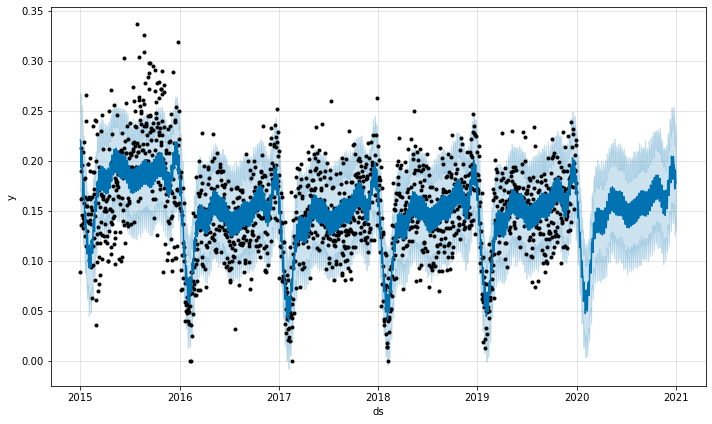

In [30]:
model1.plot(forecast1); # график, включающий прогноз

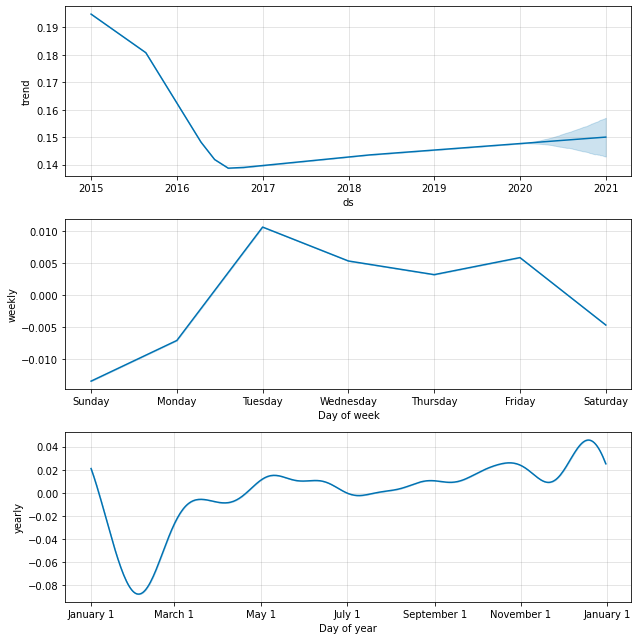

In [31]:
model1.plot_components(forecast1); # графики временных трендов

### Обзор графиков модели по блогерскому трафику:

Общий тренд -  медленный рост с 2017. 

При сравнении со средней конверсией, данные которой можно увидеть выше в данном ноутбуке, мы получили близкие результаты, а именнно:

Понедельник, суббота и воскресенье дни с наименьшей конверсией, а вторник, среда, четверг и пятница наиболее "конверсионно успешные".

Январь и февраль месяцы с наименьшей конверсией, с марта начинается рост до средних уровней конверсии, и в декабре достигается пик.

In [32]:
future2 = model2.make_future_dataframe(periods=366) # говорим профету сделать дата-фрейм на 366 дней (1 год)

In [33]:
forecast2 = model2.predict(future2)
forecast2#.head() # возвращает много колонок

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,0.085967,0.086453,0.142756,0.085967,0.085967,0.029613,0.029613,0.029613,0.005882,0.005882,0.005882,0.023730,0.023730,0.023730,0.0,0.0,0.0,0.115579
1,2015-01-02,0.085976,0.082113,0.136493,0.085976,0.085976,0.024324,0.024324,0.024324,0.001332,0.001332,0.001332,0.022992,0.022992,0.022992,0.0,0.0,0.0,0.110300
2,2015-01-03,0.085986,0.072550,0.130643,0.085986,0.085986,0.014971,0.014971,0.014971,-0.007129,-0.007129,-0.007129,0.022100,0.022100,0.022100,0.0,0.0,0.0,0.100957
3,2015-01-04,0.085995,0.067460,0.124940,0.085995,0.085995,0.009570,0.009570,0.009570,-0.011483,-0.011483,-0.011483,0.021053,0.021053,0.021053,0.0,0.0,0.0,0.095565
4,2015-01-05,0.086005,0.080558,0.133636,0.086005,0.086005,0.020671,0.020671,0.020671,0.000817,0.000817,0.000817,0.019853,0.019853,0.019853,0.0,0.0,0.0,0.106675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2020-12-27,0.098296,0.082689,0.142925,0.098117,0.098477,0.013787,0.013787,0.013787,-0.011483,-0.011483,-0.011483,0.025270,0.025270,0.025270,0.0,0.0,0.0,0.112082
2188,2020-12-28,0.098300,0.097613,0.152087,0.098120,0.098481,0.025979,0.025979,0.025979,0.000817,0.000817,0.000817,0.025162,0.025162,0.025162,0.0,0.0,0.0,0.124279
2189,2020-12-29,0.098303,0.102608,0.157028,0.098123,0.098486,0.029639,0.029639,0.029639,0.004712,0.004712,0.004712,0.024927,0.024927,0.024927,0.0,0.0,0.0,0.127942
2190,2020-12-30,0.098307,0.100284,0.159647,0.098126,0.098491,0.030425,0.030425,0.030425,0.005869,0.005869,0.005869,0.024556,0.024556,0.024556,0.0,0.0,0.0,0.128732


In [34]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # оставим только нужные

,ds,yhat,yhat_lower,yhat_upper
2187,2020-12-27,0.112082,0.082689,0.142925
2188,2020-12-28,0.124279,0.097613,0.152087
2189,2020-12-29,0.127942,0.102608,0.157028
2190,2020-12-30,0.128732,0.100284,0.159647
2191,2020-12-31,0.128236,0.102346,0.155596


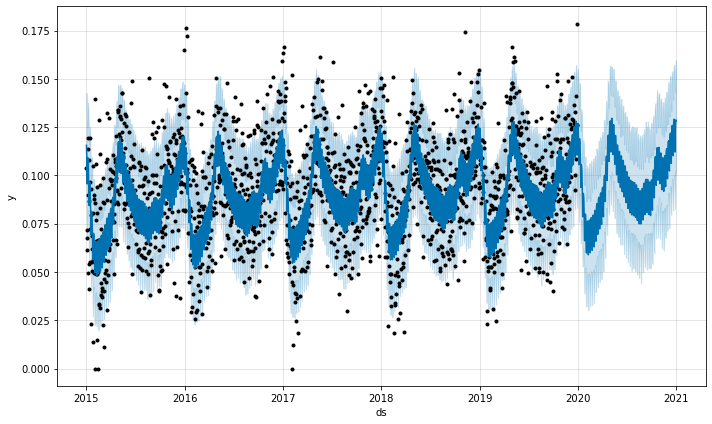

In [35]:
model2.plot(forecast2);

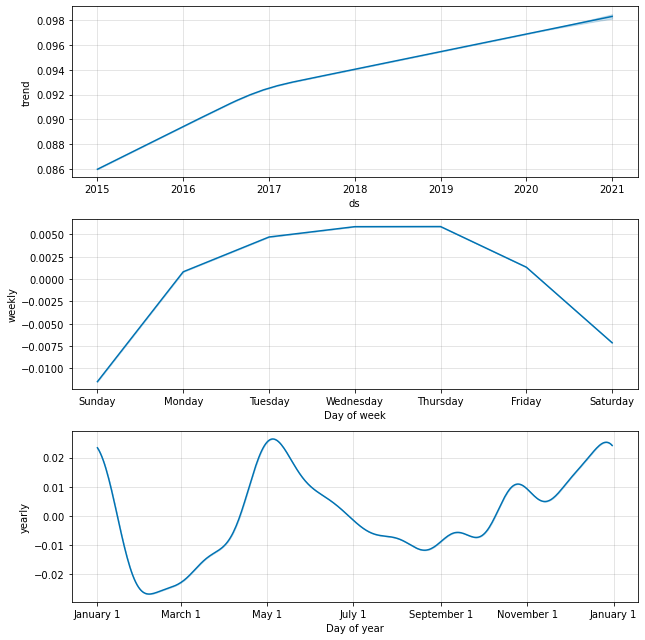

In [36]:
model2.plot_components(forecast2);

### Обзор графиков модели по естественному трафику:

Общий тренд - линейный рост.

При сравнении со средней конверсией, данные которой можно увидеть выше в данном ноутбуке, мы получили несколько отличные 
результаты, а именно:
    

Суббота и воскресенье дни с наименьшей конверсией, а среда и четверг- с наибольшей.

В данном случае можно сказать, что будни с пиком в среду наиболее успешные с точки зрения конверсии, 
и в общей логике результаты прогнозирования всё-таки соответсвуют результатам при подсчёте средней конверсии.


Январь и февраль месяцы с наименьшей конверсией, с марта начинается рост до средних уровней конверсии и с пиком к маю и последующим локальным минимумом к сентябрю, а в декабре достигается ещё один пик.

Результаты сравнимы, исходя из логики, что в будни совершается больше покупок, также как и перед летом, и к декабрю..

In [37]:
future3 = model3.make_future_dataframe(periods=7) # говорим профету сделать дата-фрейм на 365 дней (1 год)

In [38]:
forecast3 = model3.predict(future3)
forecast3.head() # возвращает много колонок

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-11-01,0.203747,0.181169,0.252073,0.203747,0.203747,0.011436,0.011436,0.011436,0.011436,0.011436,0.011436,0.0,0.0,0.0,0.215184
1,2019-11-02,0.202061,0.160091,0.230768,0.202061,0.202061,-0.006594,-0.006594,-0.006594,-0.006594,-0.006594,-0.006594,0.0,0.0,0.0,0.195467
2,2019-11-03,0.200375,0.162985,0.233964,0.200375,0.200375,-0.001089,-0.001089,-0.001089,-0.001089,-0.001089,-0.001089,0.0,0.0,0.0,0.199286
3,2019-11-04,0.198688,0.140379,0.213017,0.198688,0.198688,-0.023563,-0.023563,-0.023563,-0.023563,-0.023563,-0.023563,0.0,0.0,0.0,0.175125
4,2019-11-05,0.197002,0.162824,0.236132,0.197002,0.197002,0.000748,0.000748,0.000748,0.000748,0.000748,0.000748,0.0,0.0,0.0,0.197750


In [39]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # оставим только нужные

,ds,yhat,yhat_lower,yhat_upper
25,2019-11-26,0.162335,0.128574,0.200137
26,2019-11-27,0.154149,0.118517,0.192548
27,2019-11-28,0.183030,0.147108,0.218970
28,2019-11-29,0.167965,0.131551,0.204097
29,2019-11-30,0.148248,0.114095,0.188150


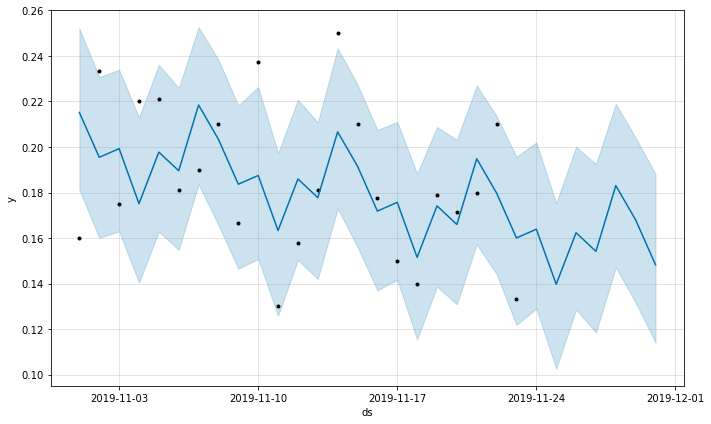

In [40]:
model3.plot(forecast3);

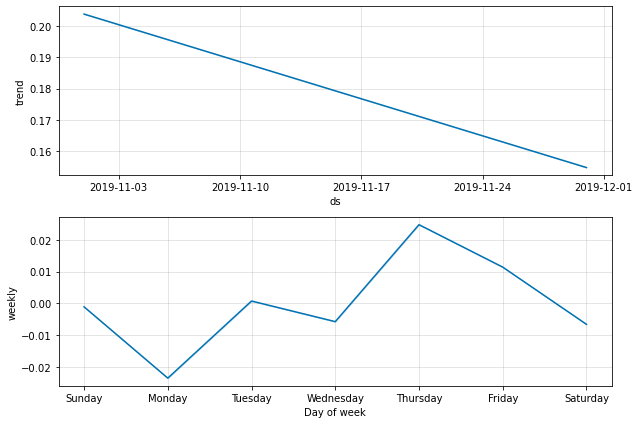

In [41]:
model3.plot_components(forecast3);

### Обзор графиков модели в случае рекламы на игровых площадках:

Общий тренд - скорее, убывающий.

При сравнении со средней конверсией, данные которой можно увидеть выше в данном ноутбуке, мы получили несколько отличные 
результаты, а именно:
    
Однозначно выделяется пик в четверг. Соответсвенно, падение к выходным, и рост с понедельника.

И здесь есть отличие от результатов при подсчёте средней конверсии. Возможно для более точного прогнозирования недостаточно данных.

Ну и для помесячных выводов мало данных.

In [42]:
from sklearn.metrics import mean_absolute_error # исследуем ошибку модели

print(
    mean_absolute_error(forecast1['yhat'].tail(366), test1_0['y']), 
    mean_absolute_error(forecast2['yhat'].tail(366), test2_0['y']),
    mean_absolute_error(forecast3['yhat'].tail(7), test3_0['y'])
) 


0.023325107789131036 0.015379640945545912 0.029826246480253327


In [58]:
# посмотрим ошибку в процентном выражении
print(
    np.mean(np.abs(forecast1.tail(366).reset_index()['yhat'] - test1_0['y'])/test1_0['y'])*100,
    np.mean(np.abs(forecast2.tail(366).reset_index()['yhat'] - test2_0['y'])/test2_0['y'])*100,
    np.mean(np.abs(forecast3.tail(7).reset_index()['yhat'] - test3_0['y'])/test3_0['y'])*100,
)

17.953879365968774 16.572665995608133 15.402672878734988


In [59]:
m_1 = Prophet(growth = 'linear',daily_seasonality=True, weekly_seasonality = True, seasonality_mode='multiplicative')
m_1.fit(train1_0)

m_2 = Prophet(growth = 'linear',daily_seasonality=True, weekly_seasonality = True, seasonality_mode='multiplicative')
m_2.fit(train2_0)

m_3 = Prophet(growth = 'linear',daily_seasonality=True, seasonality_mode='multiplicative')
m_3.fit(train3_0)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


In [60]:
forecast_1 = m_1.predict(future1)
forecast_2 = m_2.predict(future2)
forecast_3 = m_3.predict(future3)

In [61]:
np.mean(np.abs(forecast_1.tail(366).reset_index()['yhat'] - test1_0.reset_index()['y'])/test1_0.reset_index()['y'])*100, \
np.mean(np.abs(forecast_2.tail(366).reset_index()['yhat'] - test2_0.reset_index()['y'])/test2_0.reset_index()['y'])*100, \
np.mean(np.abs(forecast_3.tail(7).reset_index()['yhat'] - test3_0.reset_index()['y'])/test3_0.reset_index()['y'])*100

(20.47989037503495, 18.477628179842775, 37.007517035692125)

В итоге мы НЕ уменьшили ошибку, и она всё ещё остаётся достаточно значимой. Лучший результат остался при начапльных настройках, особенно выбор аддитивной, а не мультипликативной сезонности.

In [62]:
# готовим данные за всё время наблюдений

data_traffic_1 = pd.merge(actual_data_bloggers.resample('D', on='visit_date')['in_window'].sum().reset_index(), 
                  actual_data_bloggers.resample('D', on='visit_date')['in_window'].count().reset_index(),
                  how='left',left_on='visit_date', right_on='visit_date'
        )

data_traffic_1 ['convertion'] = data_traffic_1.in_window_x/data_traffic_1.in_window_y

data_traffic_1.drop(['in_window_x','in_window_y'], axis=1, inplace = True)
data_traffic_1.rename({'visit_date':'ds','convertion':'y'},axis=1, inplace = True)



data_traffic_2 = pd.merge(actual_data_organics.resample('D', on='visit_date')['in_window'].sum().reset_index(), 
                  actual_data_organics.resample('D', on='visit_date')['in_window'].count().reset_index(),
                  how='left',left_on='visit_date', right_on='visit_date'
        )

data_traffic_2 ['convertion'] = data_traffic_2.in_window_x/data_traffic_2.in_window_y

data_traffic_2.drop(['in_window_x','in_window_y'], axis=1, inplace = True)
data_traffic_2.rename({'visit_date':'ds','convertion':'y'},axis=1, inplace = True)



data_traffic_3 = pd.merge(actual_data_direct.resample('D', on='visit_date')['in_window'].sum().reset_index(), 
                  actual_data_direct.resample('D', on='visit_date')['in_window'].count().reset_index(),
                  how='left',left_on='visit_date', right_on='visit_date'
        )

data_traffic_3 ['convertion'] = data_traffic_3.in_window_x/data_traffic_3.in_window_y

data_traffic_3.drop(['in_window_x','in_window_y'], axis=1, inplace = True)
data_traffic_3.rename({'visit_date':'ds','convertion':'y'},axis=1, inplace = True)


In [63]:

# обучаем модель

m_1 = Prophet(growth = 'linear', seasonality_mode='additive')
m_1.fit(data_traffic_1)

m_2 = Prophet(growth = 'linear', seasonality_mode='additive')
m_2.fit(data_traffic_2)

m_3 = Prophet(growth = 'linear',seasonality_mode='additive')
m_3.fit(data_traffic_3)

# создаем дата-фрейм на 2021

future1 = m_1.make_future_dataframe(periods=366) # говорим профету сделать дата-фрейм на год
future2 = m_2.make_future_dataframe(periods=366)
future3 = m_3.make_future_dataframe(periods=31) # из-за малого количества данных не имеет смысл делать прогноз на год,
                                                                                                        # сделаем на 31 день

# наполняем год данными для каждого филиала

forecast_1 = m_1.predict(future1)
forecast_2 = m_2.predict(future2)
forecast_3 = m_3.predict(future3)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


## Итого у нас есть три датафрейма, содержащие прогноз:

- публикации блогеров (forecast_1)
- органический трафик (forecast_2)
- спец. компания на игровых площадках (forecast_3)

